<a href="https://colab.research.google.com/github/Manoj9642/MSC-Project/blob/main/Code_Manoj_(1)_(1)_(1).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importing necessary libraries for data manipulation, visualization, and machine learning


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay, accuracy_score, roc_auc_score, roc_curve
import warnings
warnings.filterwarnings("ignore")

# Loading the dataset from a CSV file


In [ ]:
# df = pd.read_csv('/content/Dataset.csv')
df = pd.read_csv('Dataset (1).csv')

Data Exploration

In [ ]:
# Data exploration - Checking the first few rows of the dataset

df.head()

,Unnamed: 0,Hour,HR,O2Sat,Temp,SBP,MAP,DBP,Resp,EtCO2,...,Fibrinogen,Platelets,Age,Gender,Unit1,Unit2,HospAdmTime,ICULOS,SepsisLabel,Patient_ID
0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,68.54,0,NaN,NaN,-0.02,1,0,17072
1,1,1,65.0,100.0,NaN,NaN,72.0,NaN,16.5,NaN,...,NaN,NaN,68.54,0,NaN,NaN,-0.02,2,0,17072
2,2,2,78.0,100.0,NaN,NaN,42.5,NaN,NaN,NaN,...,NaN,NaN,68.54,0,NaN,NaN,-0.02,3,0,17072
3,3,3,73.0,100.0,NaN,NaN,NaN,NaN,17.0,NaN,...,NaN,NaN,68.54,0,NaN,NaN,-0.02,4,0,17072
4,4,4,70.0,100.0,NaN,129.0,74.0,69.0,14.0,NaN,...,NaN,330.0,68.54,0,NaN,NaN,-0.02,5,0,17072


In [ ]:
# Get an overview of the dataset: column types and null values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1552210 entries, 0 to 1552209
Data columns (total 44 columns):
 #   Column            Non-Null Count    Dtype  
---  ------            --------------    -----  
 0   Unnamed: 0        1552210 non-null  int64  
 1   Hour              1552210 non-null  int64  
 2   HR                1398811 non-null  float64
 3   O2Sat             1349474 non-null  float64
 4   Temp              525226 non-null   float64
 5   SBP               1325945 non-null  float64
 6   MAP               1358940 non-null  float64
 7   DBP               1065656 non-null  float64
 8   Resp              1313875 non-null  float64
 9   EtCO2             57636 non-null    float64
 10  BaseExcess        84145 non-null    float64
 11  HCO3              65028 non-null    float64
 12  FiO2              129365 non-null   float64
 13  pH                107573 non-null   float64
 14  PaCO2             86301 non-null    float64
 15  SaO2              53561 non-null    float64
 16  

In [ ]:
# Checking the dimensions of the dataset (number of rows and columns)
df.shape

(1552210, 44)

In [ ]:
# Listing all the column names for easier reference
df.columns

Index(['Unnamed: 0', 'Hour', 'HR', 'O2Sat', 'Temp', 'SBP', 'MAP', 'DBP',
       'Resp', 'EtCO2', 'BaseExcess', 'HCO3', 'FiO2', 'pH', 'PaCO2', 'SaO2',
       'AST', 'BUN', 'Alkalinephos', 'Calcium', 'Chloride', 'Creatinine',
       'Bilirubin_direct', 'Glucose', 'Lactate', 'Magnesium', 'Phosphate',
       'Potassium', 'Bilirubin_total', 'TroponinI', 'Hct', 'Hgb', 'PTT', 'WBC',
       'Fibrinogen', 'Platelets', 'Age', 'Gender', 'Unit1', 'Unit2',
       'HospAdmTime', 'ICULOS', 'SepsisLabel', 'Patient_ID'],
      dtype='object')

In [ ]:
# Calculating the number of unique patients in the dataset
unique_patients = df['Patient_ID'].nunique()
unique_patients

40336

In [ ]:
# Calculating the percentage of missing values in each column
null_percentages = (df.isnull().sum() / len(df)) * 100

# Storing the null percentages in a new DataFrame for better visibility
null_df = pd.DataFrame({'Null Percentage': null_percentages})

# Sorting the columns based on the highest percentage of null values
null_df_sorted = null_df.sort_values(by='Null Percentage', ascending=False)

# Displaying the sorted DataFrame of missing values
print(null_df_sorted)

                  Null Percentage
Bilirubin_direct        99.807371
Fibrinogen              99.340167
TroponinI               99.047745
Bilirubin_total         98.509158
Alkalinephos            98.393194
AST                     98.377604
Lactate                 97.329872
PTT                     97.055875
SaO2                    96.549372
EtCO2                   96.286843
Phosphate               95.986303
HCO3                    95.810618
Chloride                95.460279
BaseExcess              94.579020
PaCO2                   94.440121
Calcium                 94.116067
Platelets               94.059502
Creatinine              93.904433
Magnesium               93.689578
WBC                     93.593199
BUN                     93.134434
pH                      93.069688
Hgb                     92.617558
FiO2                    91.665754
Hct                     91.145979
Potassium               90.689082
Glucose                 82.894325
Temp                    66.162697
Unit2         

Feature Engineering

In [ ]:
# Creating a single column for ICU units by summing 'Unit1' and 'Unit2'
df = df.assign(Unit=df['Unit1'] + df['Unit2'])

In [ ]:
# Dropping unnecessary or redundant columns from the dataset

columns_redundant={'Unnamed: 0','SBP','DBP','EtCO2','BaseExcess', 'HCO3','pH','PaCO2','Alkalinephos', 'Calcium','Magnesium',
'Phosphate','Potassium','PTT','Fibrinogen','Unit1','Unit2'}
df = df.drop(columns=columns_redundant)

In [ ]:
# Imputing missing values using forward fill and backward fill method, grouped by patient

df_imputed = df.groupby('Patient_ID').apply(lambda group: group.ffill().bfill())
df_imputed.head()

,Hour,HR,O2Sat,Temp,MAP,Resp,FiO2,SaO2,AST,BUN,...,Hgb,WBC,Platelets,Age,Gender,HospAdmTime,ICULOS,SepsisLabel,Patient_ID,Unit
0,0,65.0,100.0,35.78,72.0,16.5,0.4,NaN,29.0,23.0,...,9.5,11.3,330.0,68.54,0,-0.02,1,0,17072,NaN
1,1,65.0,100.0,35.78,72.0,16.5,0.4,NaN,29.0,23.0,...,9.5,11.3,330.0,68.54,0,-0.02,2,0,17072,NaN
2,2,78.0,100.0,35.78,42.5,16.5,0.4,NaN,29.0,23.0,...,9.5,11.3,330.0,68.54,0,-0.02,3,0,17072,NaN
3,3,73.0,100.0,35.78,42.5,17.0,0.4,NaN,29.0,23.0,...,9.5,11.3,330.0,68.54,0,-0.02,4,0,17072,NaN
4,4,70.0,100.0,35.78,74.0,14.0,0.4,NaN,29.0,23.0,...,9.5,11.3,330.0,68.54,0,-0.02,5,0,17072,NaN


In [ ]:
# Resetting the index to remove the groupby structure from the imputed dataset

df_imputed.reset_index(drop=True, inplace=True)
df_imputed.head()

,Hour,HR,O2Sat,Temp,MAP,Resp,FiO2,SaO2,AST,BUN,...,Hgb,WBC,Platelets,Age,Gender,HospAdmTime,ICULOS,SepsisLabel,Patient_ID,Unit
0,0,65.0,100.0,35.78,72.0,16.5,0.4,NaN,29.0,23.0,...,9.5,11.3,330.0,68.54,0,-0.02,1,0,17072,NaN
1,1,65.0,100.0,35.78,72.0,16.5,0.4,NaN,29.0,23.0,...,9.5,11.3,330.0,68.54,0,-0.02,2,0,17072,NaN
2,2,78.0,100.0,35.78,42.5,16.5,0.4,NaN,29.0,23.0,...,9.5,11.3,330.0,68.54,0,-0.02,3,0,17072,NaN
3,3,73.0,100.0,35.78,42.5,17.0,0.4,NaN,29.0,23.0,...,9.5,11.3,330.0,68.54,0,-0.02,4,0,17072,NaN
4,4,70.0,100.0,35.78,74.0,14.0,0.4,NaN,29.0,23.0,...,9.5,11.3,330.0,68.54,0,-0.02,5,0,17072,NaN


In [ ]:
# Checking for null values again after imputation
# Calculate percentage of null values in each column
null_percentages = (df_imputed.isnull().sum() / len(df)) * 100
null_df = pd.DataFrame({'Null Percentage': null_percentages})
null_df_sorted = null_df.sort_values(by='Null Percentage', ascending=False)
print(null_df_sorted)

                  Null Percentage
Bilirubin_direct        93.266633
TroponinI               81.905412
Lactate                 63.533607
SaO2                    62.980589
Bilirubin_total         59.799447
AST                     59.567520
FiO2                    50.224390
Chloride                44.905329
Unit                    39.425078
WBC                      4.227456
Platelets                4.150598
Hgb                      3.963317
Hct                      3.786472
Creatinine               3.275459
BUN                      3.233583
Glucose                  2.708783
Temp                     0.478672
MAP                      0.173817
Resp                     0.128784
O2Sat                    0.024095
HR                       0.009148
HospAdmTime              0.000515
Age                      0.000000
Gender                   0.000000
ICULOS                   0.000000
SepsisLabel              0.000000
Patient_ID               0.000000
Hour                     0.000000


In [ ]:
# Dropping columns with more than 10% missing values

null_col = ['TroponinI', 'Bilirubin_direct', 'AST', 'Bilirubin_total', 'Lactate', 'SaO2', 'FiO2',
            'Unit']
df_imputed = df_imputed.drop(columns=null_col)
df_imputed.head()


,Hour,HR,O2Sat,Temp,MAP,Resp,BUN,Chloride,Creatinine,Glucose,Hct,Hgb,WBC,Platelets,Age,Gender,HospAdmTime,ICULOS,SepsisLabel,Patient_ID
0,0,65.0,100.0,35.78,72.0,16.5,23.0,104.0,0.8,161.0,29.7,9.5,11.3,330.0,68.54,0,-0.02,1,0,17072
1,1,65.0,100.0,35.78,72.0,16.5,23.0,104.0,0.8,161.0,29.7,9.5,11.3,330.0,68.54,0,-0.02,2,0,17072
2,2,78.0,100.0,35.78,42.5,16.5,23.0,104.0,0.8,161.0,29.7,9.5,11.3,330.0,68.54,0,-0.02,3,0,17072
3,3,73.0,100.0,35.78,42.5,17.0,23.0,104.0,0.8,161.0,29.7,9.5,11.3,330.0,68.54,0,-0.02,4,0,17072
4,4,70.0,100.0,35.78,74.0,14.0,23.0,104.0,0.8,161.0,29.7,9.5,11.3,330.0,68.54,0,-0.02,5,0,17072


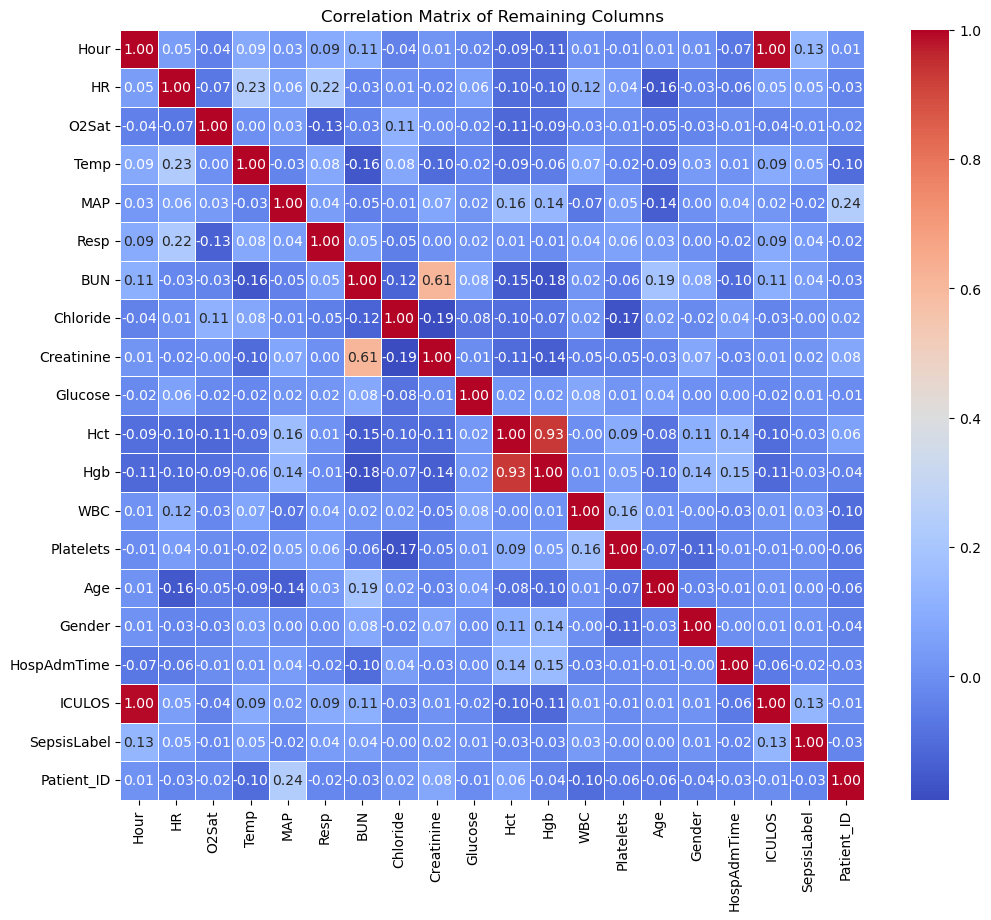

In [ ]:
# Compute the correlation matrix to understand relationships between features

correlation_matrix = df_imputed.corr()

# Visualizing the correlation matrix using a heatmap

plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix of Remaining Columns')
plt.show()

In [ ]:
# Dropping 'ICULOS' due to high correlation with other features

df_imputed.drop(columns=['ICULOS'], inplace=True)


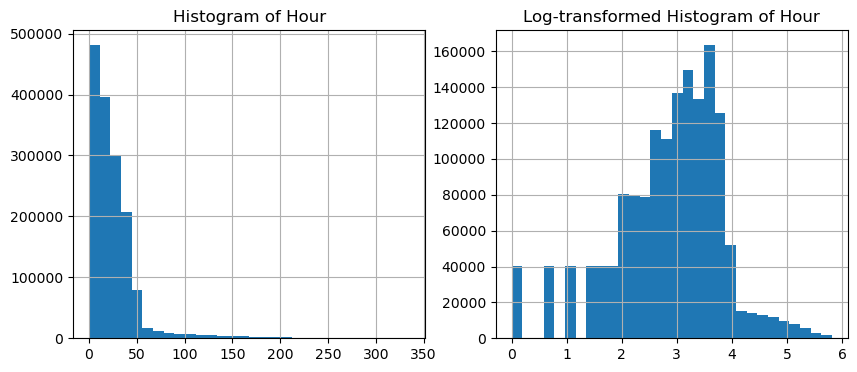

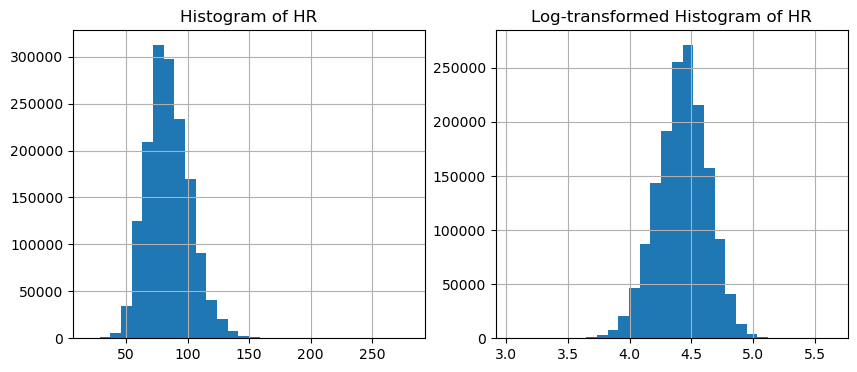

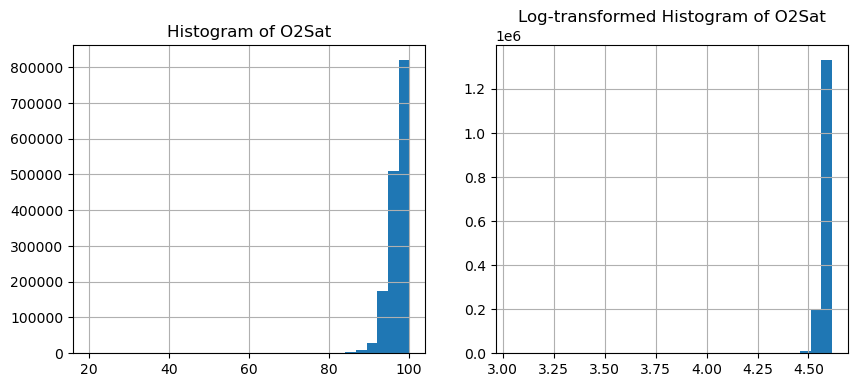

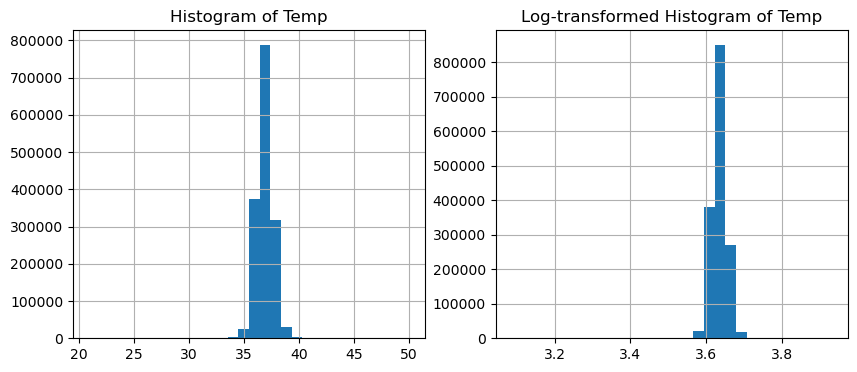

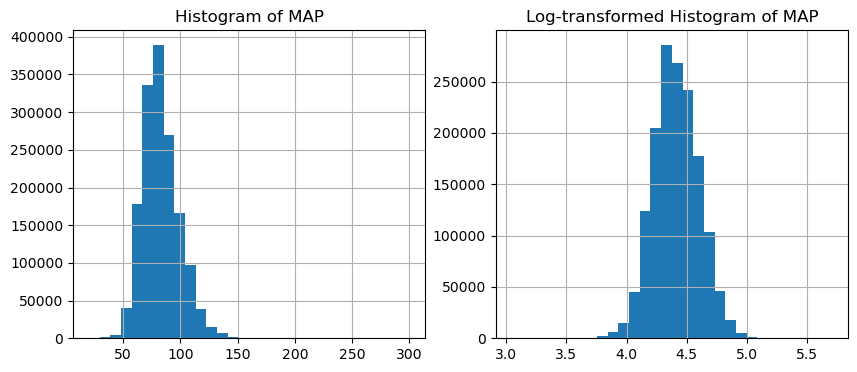

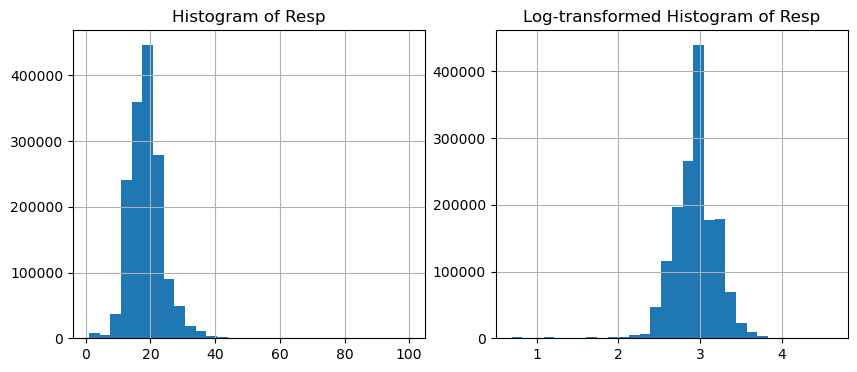

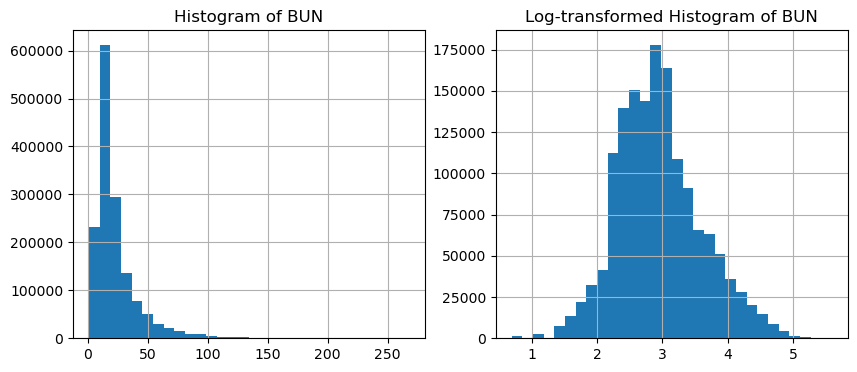

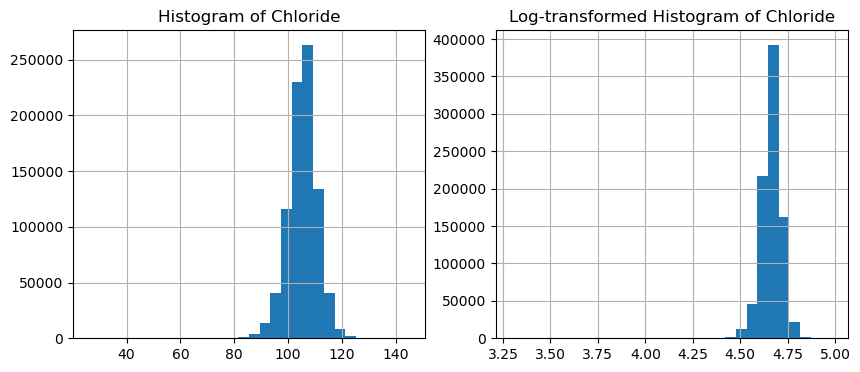

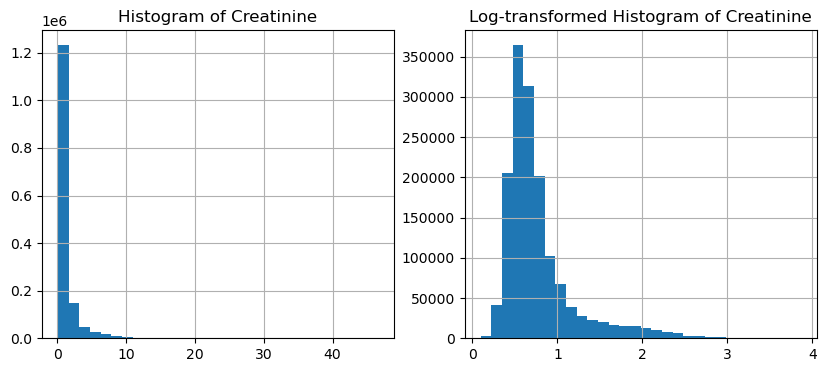

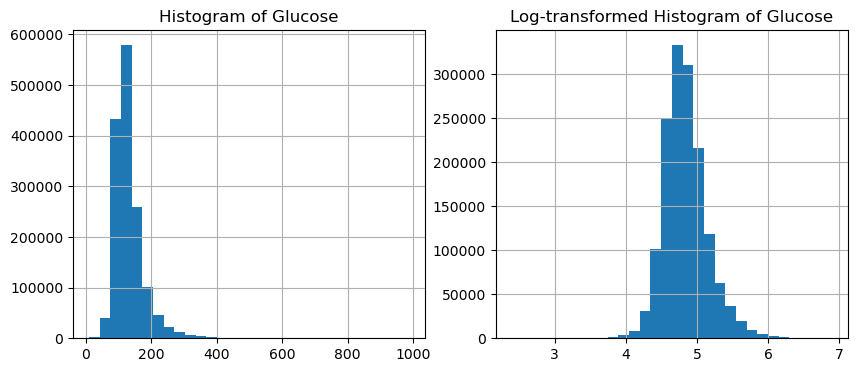

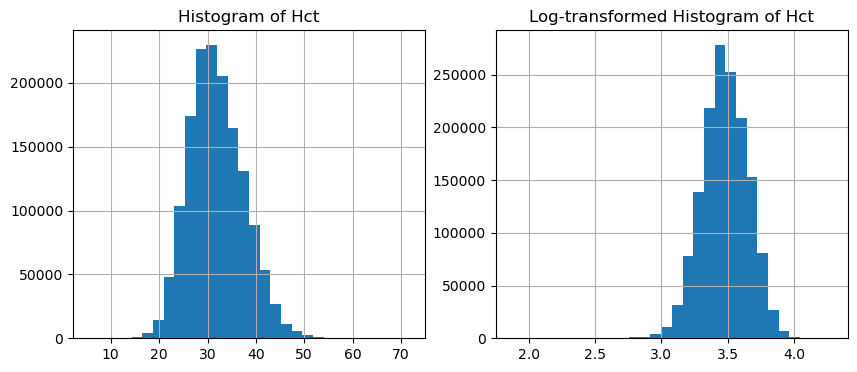

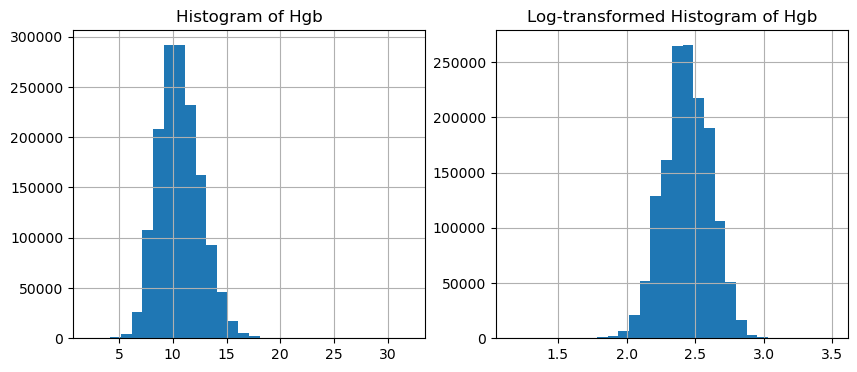

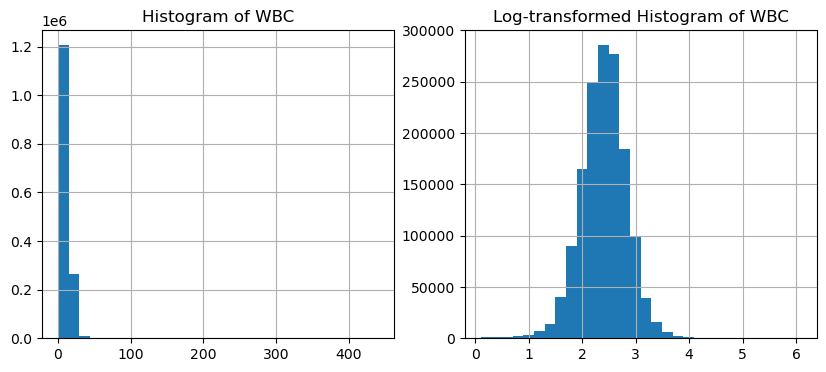

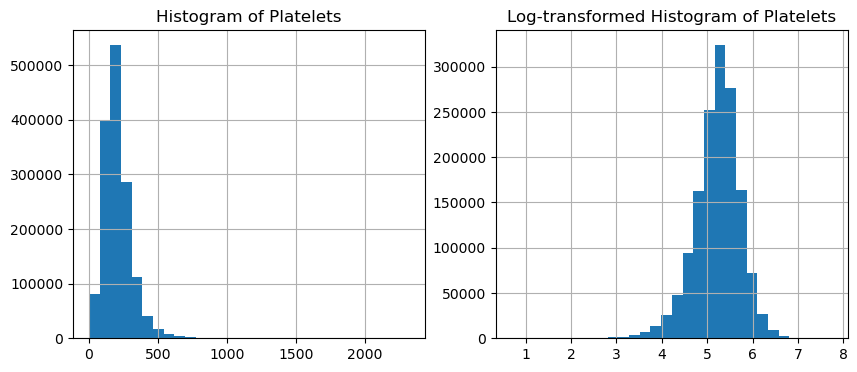

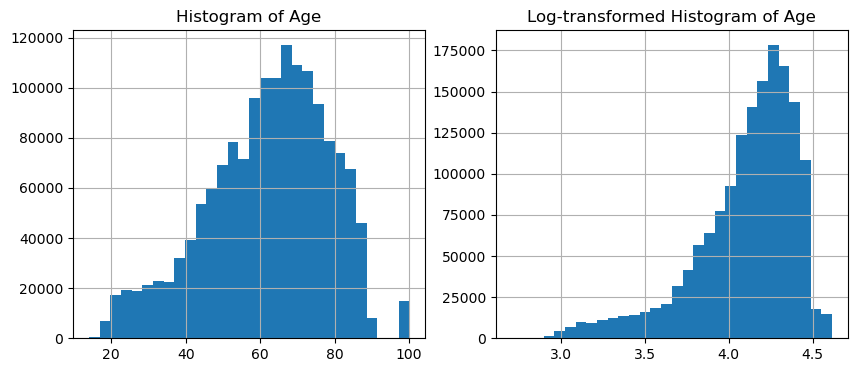

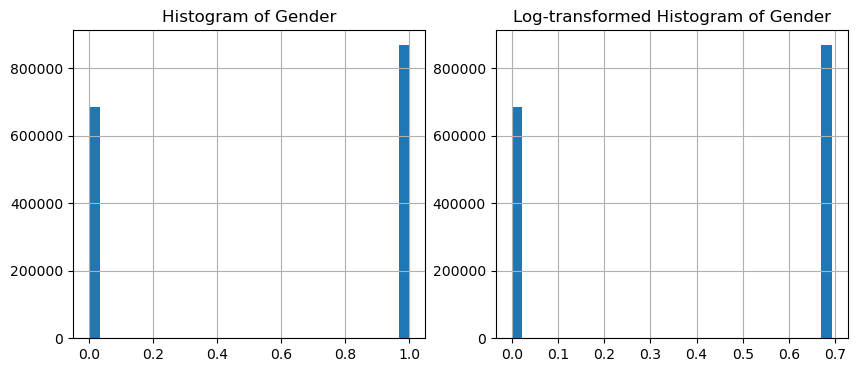

ValueError: supplied range of [-inf, 3.218475744846861] is not finite

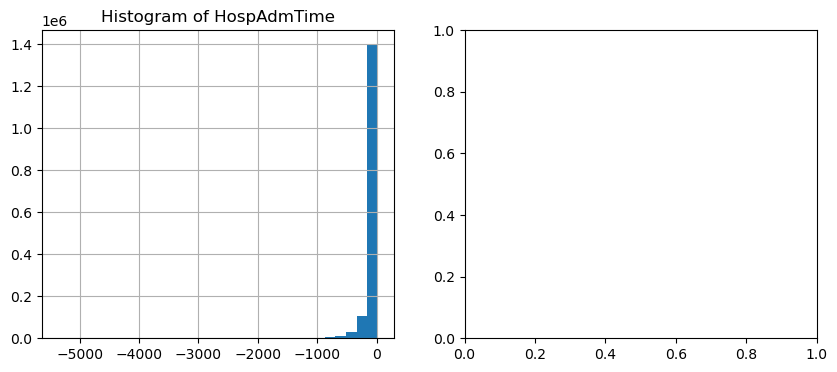

In [ ]:
import matplotlib.pyplot as plt

# Visualizing distributions and log-transformed distributions for each feature in the dataset

for column in df_imputed.columns:
    plt.figure(figsize=(10, 4))

    # Plotting the histogram of the original values
    plt.subplot(1, 2, 1)
    df_imputed[column].hist(bins=30)
    plt.title(f'Histogram of {column}')

    # Plotting log-transformed histogram (added +1 to avoid log(0) issues)
    plt.subplot(1, 2, 2)
    (df_imputed[column] + 1).apply(np.log).hist(bins=30)
    plt.title(f'Log-transformed Histogram of {column}')

    plt.show()

Log tranformation

In [ ]:
# Log transformation - Applying log transformation to certain columns for normalization
columns_to_transform = ['MAP', 'BUN', 'Creatinine', 'Glucose', 'WBC', 'Platelets']

# Log transforming the selected columns
for column in columns_to_transform:
    df_imputed[column] = df_imputed[column].apply(lambda x: np.log(x))

df_imputed[columns_to_transform].head()

,MAP,BUN,Creatinine,Glucose,WBC,Platelets
0,4.276666,3.135494,-0.223144,5.081404,2.424803,5.799093
1,4.276666,3.135494,-0.223144,5.081404,2.424803,5.799093
2,3.749504,3.135494,-0.223144,5.081404,2.424803,5.799093
3,3.749504,3.135494,-0.223144,5.081404,2.424803,5.799093
4,4.304065,3.135494,-0.223144,5.081404,2.424803,5.799093


Feature Scaling

In [ ]:
# Feature scaling - Standardizing the features to have mean 0 and variance 1

columns_to_scale = ['HR', 'O2Sat', 'Temp', 'MAP', 'Resp', 'BUN', 'Chloride',
                    'Creatinine', 'Glucose', 'Hct', 'Hgb', 'WBC', 'Platelets']

# Applying scaling to selected columns
scaler = StandardScaler()

# Applying standard scaling to the data

df_imputed[columns_to_scale] = scaler.fit_transform(df_imputed[columns_to_scale])

In [ ]:
df_imputed.isnull().sum()

Hour                0
HR                142
O2Sat             374
Temp             7430
MAP              2698
Resp             1999
BUN             50192
Chloride       697025
Creatinine      50842
Glucose         42046
Hct             58774
Hgb             61519
WBC             65619
Platelets       64426
Age                 0
Gender              0
HospAdmTime         8
SepsisLabel         0
Patient_ID          0
dtype: int64

In [ ]:
# Dropping rows with any remaining null values to ensure a clean dataset for modeling
df_final = df_imputed.dropna()
df_final.shape

(840526, 19)

0    823283
1     17243
Name: SepsisLabel, dtype: int64


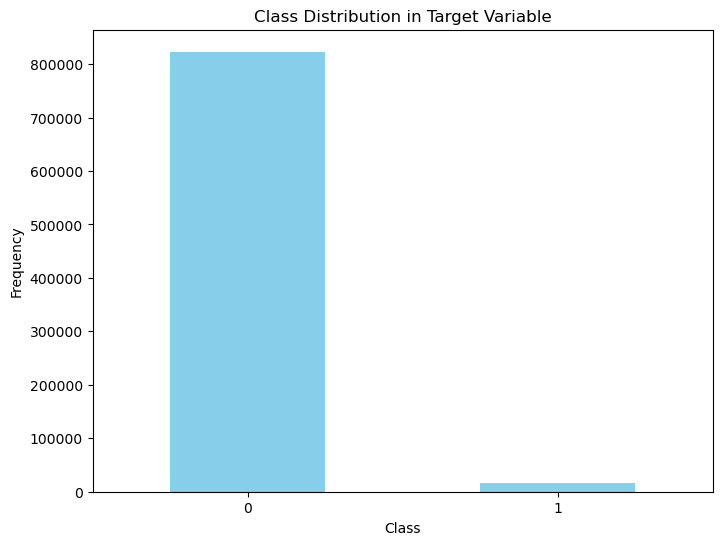

In [ ]:
# Checking the distribution of the target variable (SepsisLabel) to understand class imbalance

class_distribution = df_final['SepsisLabel'].value_counts()

# Visualizing the class distribution using a bar chart
print(class_distribution)
plt.figure(figsize=(8, 6))
class_distribution.plot(kind='bar', color='skyblue')
plt.title('Class Distribution in Target Variable')
plt.xlabel('Class')
plt.ylabel('Frequency')
plt.xticks(rotation=0)
plt.show()

In [ ]:
# Separating features and target variable for machine learning modeling

X = df_final.drop(['SepsisLabel', 'Patient_ID'], axis=1)
y = df_final['SepsisLabel']

# Splitting the data into training and testing sets (80% training, 20% testing)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Handling class imbalance using Random Under sampling

In [ ]:
from imblearn.under_sampling import RandomUnderSampler

# Initialize Random UnderSampler
rus = RandomUnderSampler(sampling_strategy='auto', random_state=42)

# Resampling the training data to balance the classes
X_resampled, y_resampled = rus.fit_resample(X_train, y_train)

In [ ]:
y_resampled.value_counts()

0    13718
1    13718
Name: SepsisLabel, dtype: int64

1. Logistic Regression

Accuracy: 0.77
Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.77      0.87    164581
           1       0.05      0.62      0.10      3525

    accuracy                           0.77    168106
   macro avg       0.52      0.70      0.48    168106
weighted avg       0.97      0.77      0.85    168106

Confusion Matrix:
[[126851  37730]
 [  1333   2192]]


<Figure size 800x600 with 0 Axes>

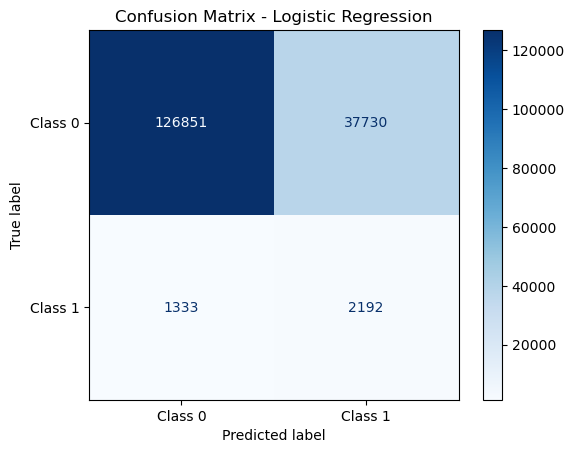

AUC-ROC: 0.76


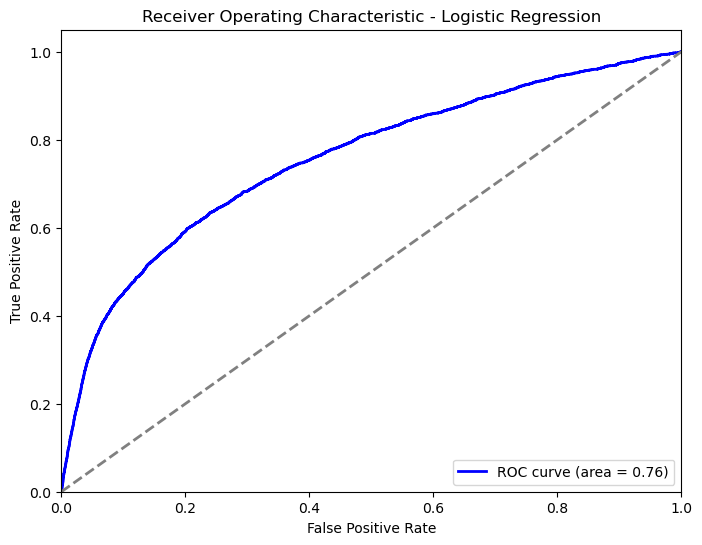

In [ ]:
# Training a Logistic Regression model on the resampled data
from sklearn.linear_model import LogisticRegression

# Initialize Logistic Regression model
# The random_state ensures reproducibility of results by controlling the randomness

lr_model = LogisticRegression(random_state=42)

# Fit the model with resampled data
# X_resampled and y_resampled refer to the resampled training data (after dealing with class imbalance)

lr_model.fit(X_resampled, y_resampled)

# Predict the target for the test set (X_test)
y_pred = lr_model.predict(X_test)

# Predicting probabilities for the positive class (1) for ROC-AUC calculation
y_prob = lr_model.predict_proba(X_test)[:, 1]  # Probabilities for the positive class

# Evaluating the Logistic Regression model's performance
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

# Displaying the classification report (precision, recall, f1-score, and support)
report = classification_report(y_test, y_pred)
print("Classification Report:")
print(report)

# Displaying the confusion matrix to visualize the number of true/false positives and negatives
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)

# Visualizing the confusion matrix as a heatmap for better understanding
plt.figure(figsize=(8, 6))
ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Class 0', 'Class 1']).plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix - Logistic Regression')
plt.show()

# Computing and plotting the ROC-AUC curve to evaluate the model's performance in distinguishing between classes
auc = roc_auc_score(y_test, y_prob)
print(f"AUC-ROC: {auc:.2f}")

# Calculating false positive rate and true positive rate for the ROC curve
fpr, tpr, _ = roc_curve(y_test, y_prob)

# Plot ROC curve to visualize model's performance
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (area = {auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic - Logistic Regression')
plt.legend(loc="lower right")
plt.show()


2. Random Forest

Accuracy: 0.92
Classification Report:
              precision    recall  f1-score   support

     Class 0       1.00      0.91      0.95    164581
     Class 1       0.19      0.97      0.32      3525

    accuracy                           0.92    168106
   macro avg       0.60      0.94      0.64    168106
weighted avg       0.98      0.92      0.94    168106

Confusion Matrix:
[[150448  14133]
 [   122   3403]]


<Figure size 800x600 with 0 Axes>

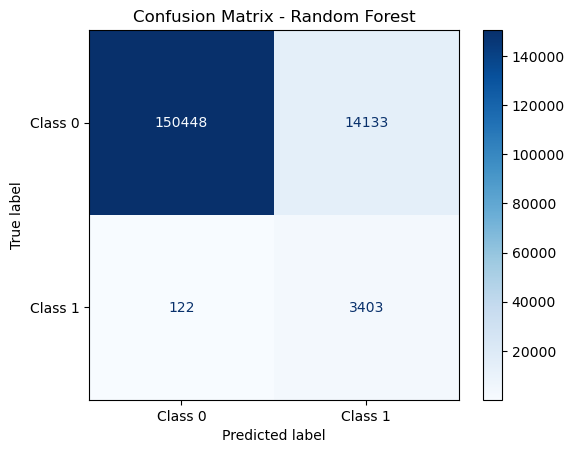

AUC-ROC: 0.98


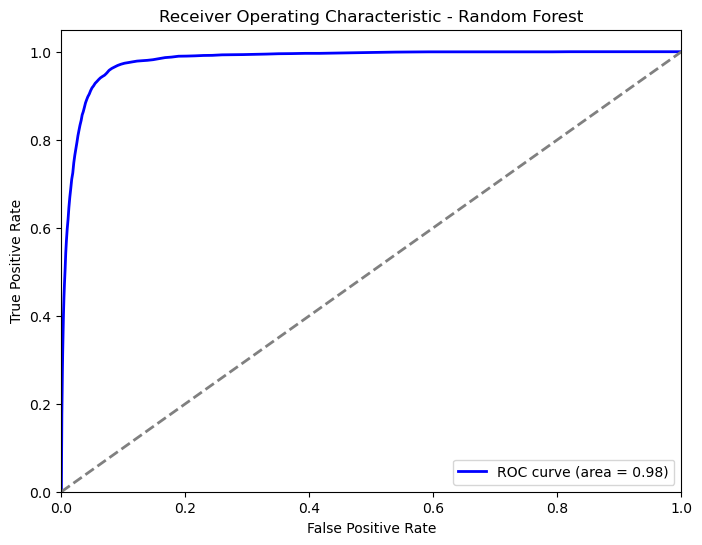

In [ ]:
# Training and evaluating a Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier

# Initialize Random Forest Classifier
# Random state ensures reproducibility, and the classifier is used for both classification and feature importance analysis
rf_model = RandomForestClassifier(random_state=42)

# Fit the model with resampled data
rf_model.fit(X_resampled, y_resampled)

# Predict the target variable for the test set (X_test)
y_pred = rf_model.predict(X_test)
# Predict probabilities for the positive class for AUC-ROC curve
y_prob = rf_model.predict_proba(X_test)[:, 1]  # Probabilities for the positive class

# Compute the accuracy of the Random Forest model on the test set
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

# Compute and print the classification report (precision, recall, f1-score, and support)
report = classification_report(y_test, y_pred, target_names=['Class 0', 'Class 1'])
print("Classification Report:")
print(report)

# Compute and print confusion matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)

# Visualize the confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Class 0', 'Class 1']).plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix - Random Forest')
plt.show()

# Compute the AUC-ROC score to measure the classifier's ability to distinguish between classes
auc = roc_auc_score(y_test, y_prob)
print(f"AUC-ROC: {auc:.2f}")

# Compute ROC curve
fpr, tpr, _ = roc_curve(y_test, y_prob)

# Plot ROC curve to visualize model performance
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (area = {auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic - Random Forest')
plt.legend(loc="lower right")
plt.show()

3. CNN

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from imblearn.under_sampling import RandomUnderSampler
from keras.models import Sequential
from keras.layers import Conv1D, MaxPooling1D, Flatten, Dense
from keras.utils import to_categorical

# Features and target separation, removing the target column and patient ID from features
X = df_final.drop(['SepsisLabel', 'Patient_ID'], axis=1)
y = df_final['SepsisLabel']

# Applying random undersampling to balance the dataset
rus = RandomUnderSampler(random_state=42)
X_resampled, y_resampled = rus.fit_resample(X, y)

# Function to prepare data for sequential modeling (e.g., CNNs, LSTMs)
def prepare_sequential_data(df, max_hours, patient_col, target_col):
    unique_patients = df[patient_col].unique()
    X_seq, y_seq = [], []

    for patient in unique_patients:
        patient_data = df[df[patient_col] == patient].drop([target_col, patient_col], axis=1).values
        label = df[df[patient_col] == patient][target_col].values[0]

        # Pad or truncate sequences to maintain a consistent length
        if len(patient_data) < max_hours:
            pad_size = max_hours - len(patient_data)
            patient_data = np.vstack([patient_data, np.zeros((pad_size, patient_data.shape[1]))])
        elif len(patient_data) > max_hours:
            patient_data = patient_data[:max_hours]

        X_seq.append(patient_data)
        y_seq.append(label)

    X_seq = np.array(X_seq)
    y_seq = np.array(y_seq)

    return X_seq, y_seq

# Define maximum number of hours for time-series data
max_hours = 48

# Prepare the sequential data for CNN model
X_sequential, y_sequential = prepare_sequential_data(df_final, max_hours, 'Patient_ID', 'SepsisLabel')

# One-hot encode the target variable (for two classes)
y_sequential = to_categorical(y_sequential, num_classes=2)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_sequential, y_sequential, test_size=0.2, random_state=42)

In [ ]:
# Define a 1D CNN model for sequential data
model = Sequential([
    Conv1D(filters=32, kernel_size=3, activation='relu', input_shape=(max_hours, X_sequential.shape[2])),
    MaxPooling1D(pool_size=2),
    Flatten(),
    Dense(64, activation='relu'),
    Dense(2, activation='softmax')
])

# Compile the CNN model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the CNN model, using validation split to track performance on unseen data
history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.2)

# Evaluate the model's performance on the test set
y_pred_prob = model.predict(X_test)
y_pred = np.argmax(y_pred_prob, axis=1)

# Convert y_test from one-hot encoded format back to single-column format
y_test_single = np.argmax(y_test, axis=1)

# Print the classification report (precision, recall, f1-score, and support)
from sklearn.metrics import classification_report, roc_auc_score

print("Classification Report:")
print(classification_report(y_test_single, y_pred))

# Print AUC Score for model's performance in distinguishing between classes
print("AUC Score:")
print(roc_auc_score(y_test_single, y_pred_prob[:, 1]))

Epoch 1/10
417/417 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.9694 - loss: 0.5682 - val_accuracy: 0.9937 - val_loss: 0.0290
Epoch 2/10
417/417 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.9975 - loss: 0.0088 - val_accuracy: 0.9973 - val_loss: 0.0072
Epoch 3/10
417/417 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.9979 - loss: 0.0059 - val_accuracy: 0.9970 - val_loss: 0.0085
Epoch 4/10
417/417 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9972 - loss: 0.0062 - val_accuracy: 0.9967 - val_loss: 0.0082
Epoch 5/10
417/417 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.9981 - loss: 0.0076 - val_accuracy: 0.9973 - val_loss: 0.0072
Epoch 6/10
417/417 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.9985 - loss: 0.0054 - val_accuracy: 0.9979 - val_loss: 0.0099
Epoch 7/10
417/417 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.9978 - loss: 0.0144 - val_accuracy: 0.9961 - val_loss: 0.0068
Epoch 8/10
417/417 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.9986 - loss: 0.0032 - val_accuracy: 0.

In [ ]:
# Compute accuracy score
accuracy = accuracy_score(y_test_single, y_pred)
print("Accuracy Score:", accuracy)

# Display confusion matrix to evaluate model's predictions
conf_matrix = confusion_matrix(y_test_single, y_pred)
print("Confusion Matrix:")
print(conf_matrix)


Accuracy Score: 0.9961612284069098
Confusion Matrix:
[[4137    2]
 [  14   15]]


4. LSTM

In [ ]:
# Importing required libraries from Keras for building and training the LSTM model
from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout
from keras.optimizers import Adam
from keras.utils import to_categorical

# Define an LSTM model using the Sequential API from Keras
lstm_model = Sequential()

# First LSTM layer with 64 units and return_sequences=True to allow stacking of another LSTM layer
# The input shape is defined as (max_hours, number of features in X_train)
lstm_model.add(LSTM(64, input_shape=(max_hours, X_train.shape[2]), return_sequences=True))

# Adding a Dropout layer to prevent overfitting by randomly setting input units to 0 with a rate of 0.5
lstm_model.add(Dropout(0.5))

# Second LSTM layer with 32 units, no return_sequences because this is the final LSTM layer
lstm_model.add(LSTM(32))

# Adding another Dropout layer for regularization
lstm_model.add(Dropout(0.5))

# Fully connected output layer with 2 units and softmax activation for binary classification (2 classes)
lstm_model.add(Dense(2, activation='softmax'))

# Compile the model by specifying the optimizer, loss function, and evaluation metric
# Adam optimizer is used with a learning rate of 0.001
# Categorical cross-entropy loss is appropriate for multi-class classification (even though we have 2 classes, softmax is used)
lstm_model.compile(optimizer=Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])

# Training the LSTM model on the training data
# Validation split of 20% is used to monitor the model's performance on unseen validation data
history = lstm_model.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.2)

# Predicting the probabilities for each class on the test set
y_pred_prob = lstm_model.predict(X_test)

# Extracting the predicted class labels (0 or 1) by selecting the class with the highest probability
y_pred = np.argmax(y_pred_prob, axis=1)

# Converting the true test labels (y_test) from one-hot encoded format back to single column format for comparison
y_test_single = np.argmax(y_test, axis=1)

# Calculate the accuracy of the LSTM model by comparing true labels with predicted labels
accuracy = accuracy_score(y_test_single, y_pred)
print("Accuracy Score:", accuracy)

# Compute the confusion matrix to display the true positive, true negative, false positive, and false negative counts
conf_matrix = confusion_matrix(y_test_single, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

# Generate a detailed classification report including precision, recall, and f1-score for each class
print("Classification Report:")
print(classification_report(y_test_single, y_pred))

# Compute the AUC score to measure the LSTM model's performance in distinguishing between classes
auc_score = roc_auc_score(y_test_single, y_pred_prob[:, 1])
print("AUC Score:", auc_score)


Epoch 1/10
417/417 ━━━━━━━━━━━━━━━━━━━━ 24s 44ms/step - accuracy: 0.9646 - loss: 0.0989 - val_accuracy: 0.9928 - val_loss: 0.0204
Epoch 2/10
417/417 ━━━━━━━━━━━━━━━━━━━━ 18s 43ms/step - accuracy: 0.9966 - loss: 0.0117 - val_accuracy: 0.9928 - val_loss: 0.0159
Epoch 3/10
417/417 ━━━━━━━━━━━━━━━━━━━━ 17s 41ms/step - accuracy: 0.9964 - loss: 0.0076 - val_accuracy: 0.9952 - val_loss: 0.0084
Epoch 4/10
417/417 ━━━━━━━━━━━━━━━━━━━━ 17s 41ms/step - accuracy: 0.9977 - loss: 0.0059 - val_accuracy: 0.9955 - val_loss: 0.0091
Epoch 5/10
417/417 ━━━━━━━━━━━━━━━━━━━━ 21s 43ms/step - accuracy: 0.9976 - loss: 0.0058 - val_accuracy: 0.9964 - val_loss: 0.0077
Epoch 6/10
417/417 ━━━━━━━━━━━━━━━━━━━━ 18s 42ms/step - accuracy: 0.9964 - loss: 0.0070 - val_accuracy: 0.9967 - val_loss: 0.0074
Epoch 7/10
417/417 ━━━━━━━━━━━━━━━━━━━━ 17s 42ms/step - accuracy: 0.9973 - loss: 0.0061 - val_accuracy: 0.9967 - val_loss: 0.0071
Epoch 8/10
417/417 ━━━━━━━━━━━━━━━━━━━━ 20s 40ms/step - accuracy: 0.9981 - loss: 0.0046 - 